<h1>Introduction to Data Science - Bank Marketing Project<h1>

    

Team Members:
    
Ophir Shurany ID: 304867716

Amit Shreiber ID: TBD
.

<h2>1. Load Database<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')
%matplotlib inline

<h3>1.1. Create dataframe<h3>

In [2]:
df = pd.read_csv("bank.csv",sep='|',encoding='utf8')
#drop duplicate data
df = df.drop_duplicates('Unnamed: 0',keep=False)
#drop #rows
df=df.drop('Unnamed: 0',axis=1)
df_copy_original=df #Keep original

<h2>2. Data Exploration<h2>

<h3>2.1. view first 5 rows in df<h3>

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39.0,admin.,married,university.degree,no,no,no,cellular,jul,mon,...,3.0,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2,51.0,management,married,university.degree,NaN,no,no,telephone,jun,fri,...,10.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,51.0,blue-collar,married,basic.4y,NaN,no,yes,telephone,jun,tue,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes
5,53.0,services,married,high.school,NaN,no,no,telephone,may,thu,...,2.0,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
6,40.0,blue-collar,married,basic.6y,no,no,no,cellular,may,tue,...,1.0,11,1,success,-1.8,92.893,-46.2,1.344,5099.1,no


<h3>2.2. Presenting all columns, number of rows and type<h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35370 entries, 0 to 39895
Data columns (total 21 columns):
age               35239 non-null float64
job               35370 non-null object
marital           35303 non-null object
education         33880 non-null object
default           27970 non-null object
housing           34527 non-null object
loan              34527 non-null object
contact           35370 non-null object
month             35370 non-null object
day_of_week       35370 non-null object
duration          35370 non-null int64
campaign          34954 non-null float64
pdays             35370 non-null int64
previous          35370 non-null int64
poutcome          35370 non-null object
emp.var.rate      35370 non-null float64
cons.price.idx    35370 non-null float64
cons.conf.idx     35370 non-null float64
euribor3m         35370 non-null float64
nr.employed       35370 non-null float64
y                 35370 non-null object
dtypes: float64(7), int64(3), object(11)
memory

<h3>2.3. Feature statistics for numerical categories<h3>

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,35239.000000,35370.000000,34954.000000,35370.000000,35370.000000,35370.000000,35370.000000,35370.000000,35370.000000,35370.000000
mean,40.042879,257.985129,2.572209,963.598728,0.168335,0.097665,93.579768,-40.467928,3.640882,5167.701453
std,10.416313,258.531122,2.767796,184.121868,0.483834,1.564469,0.577052,4.613972,1.726877,71.725021
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Histograms for categorial features

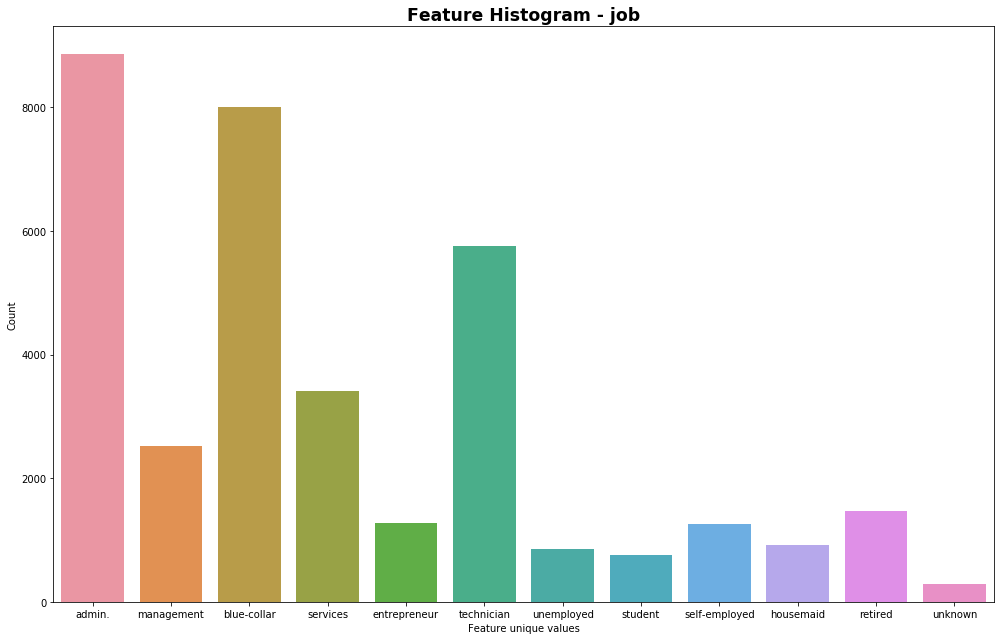

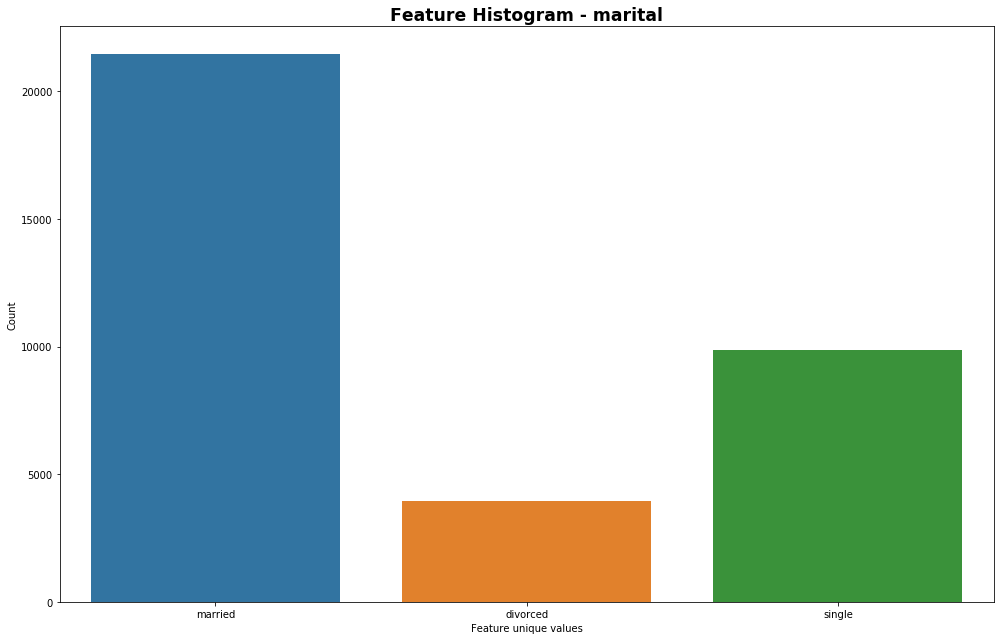

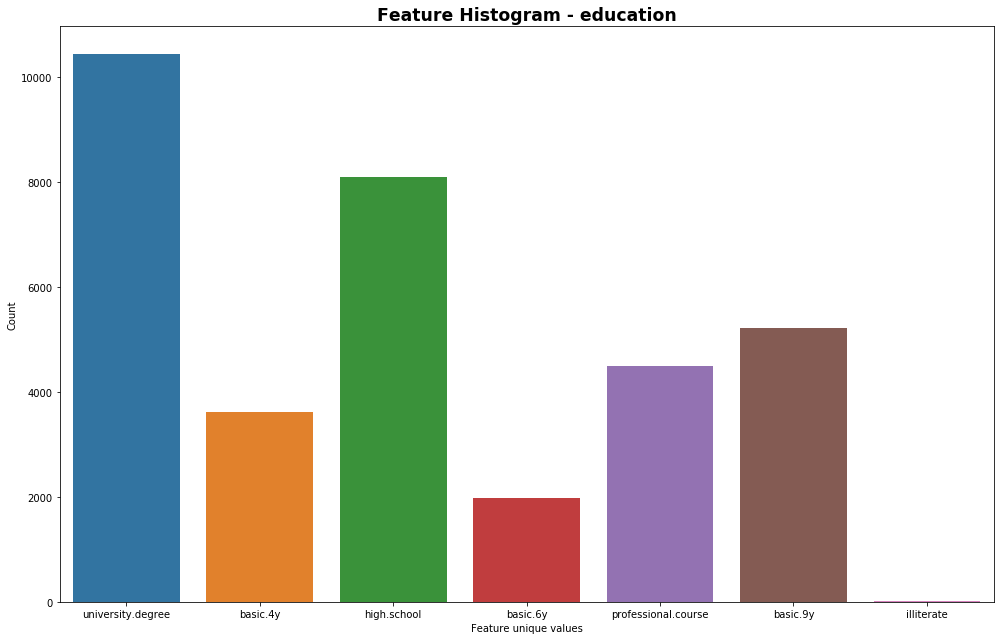

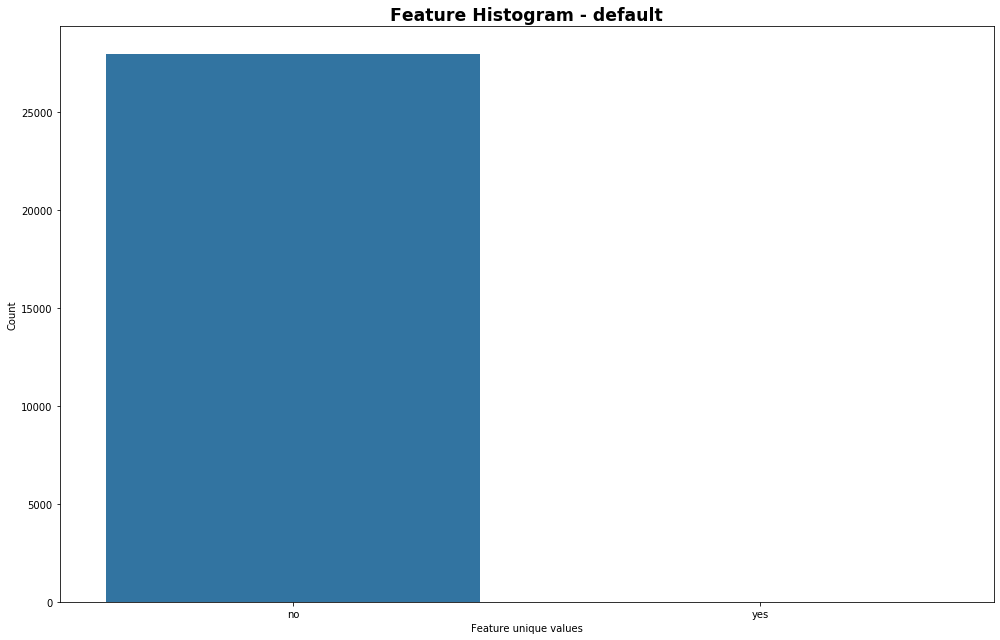

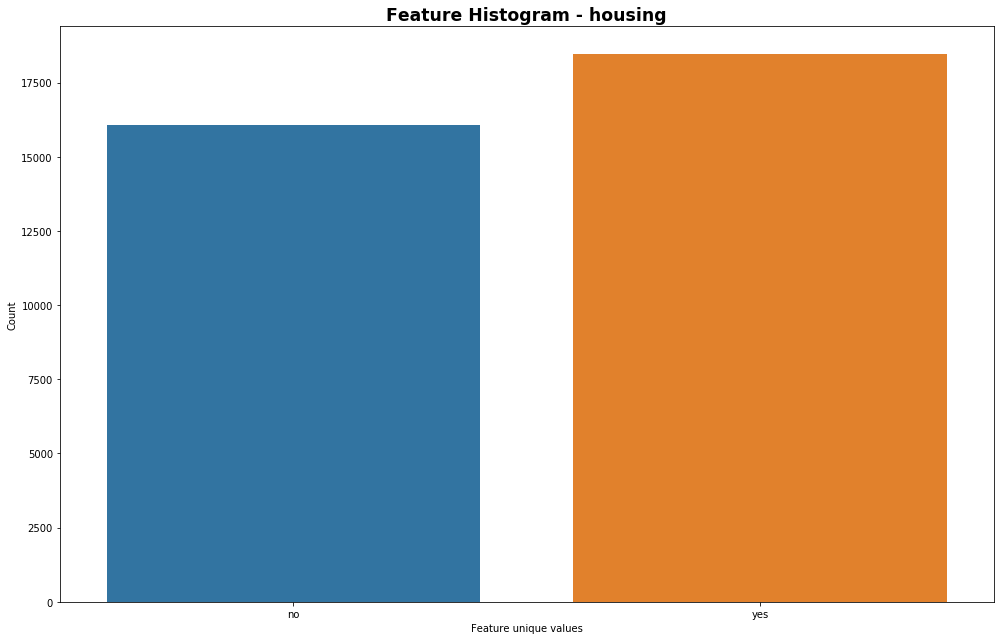

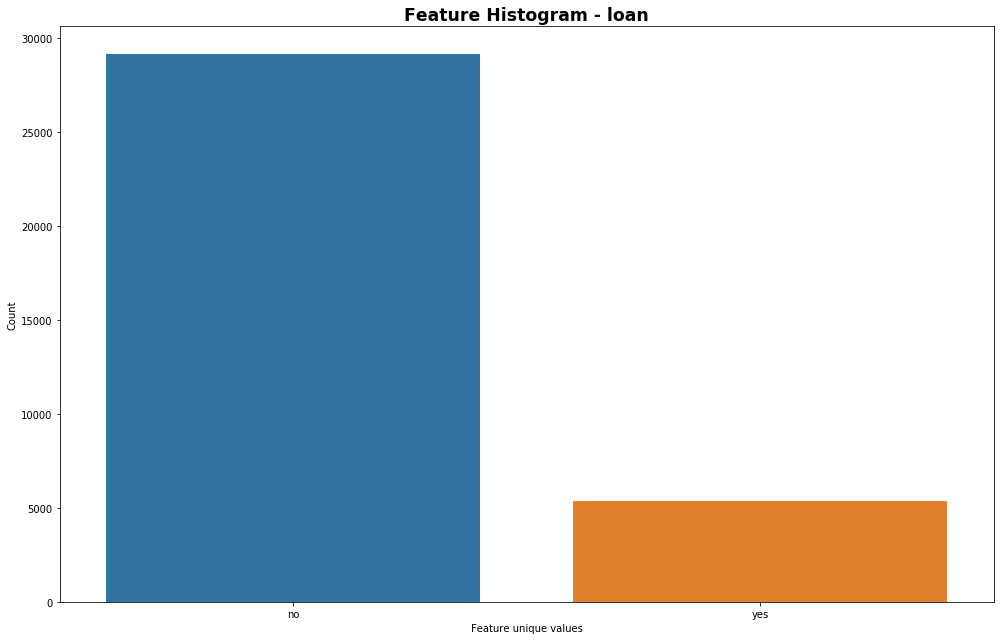

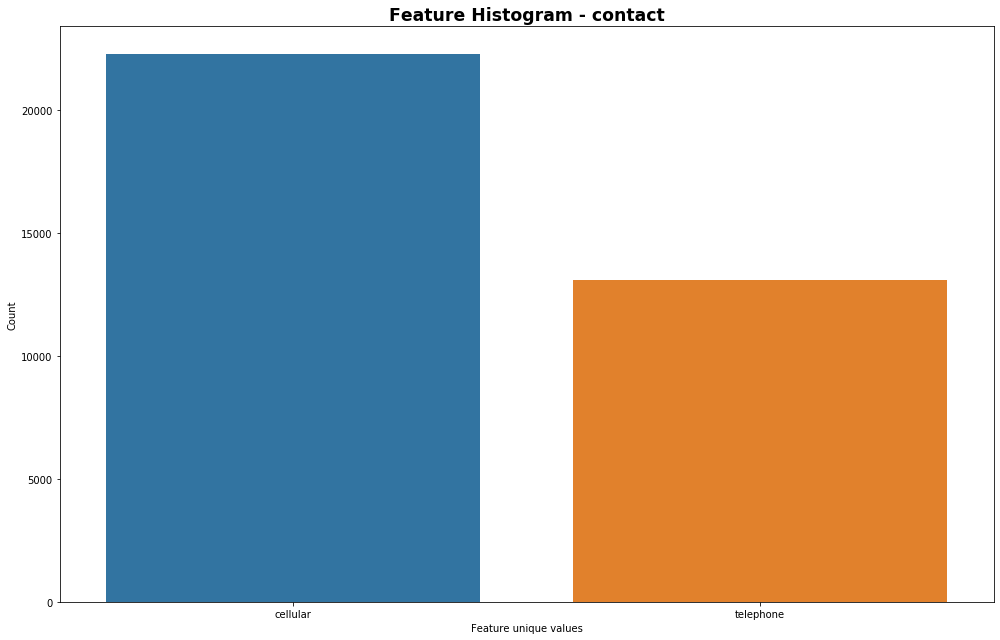

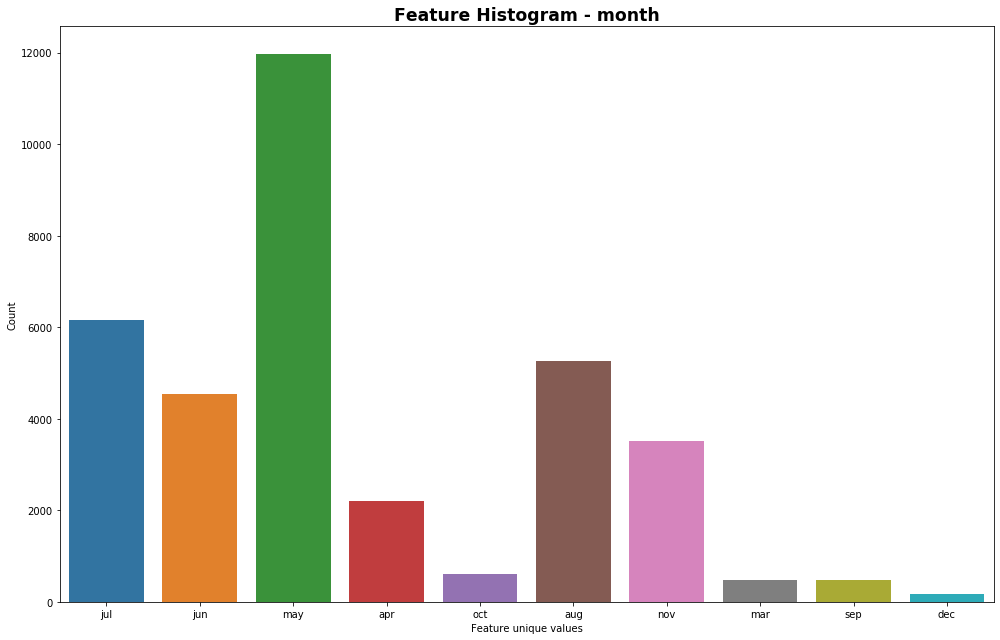

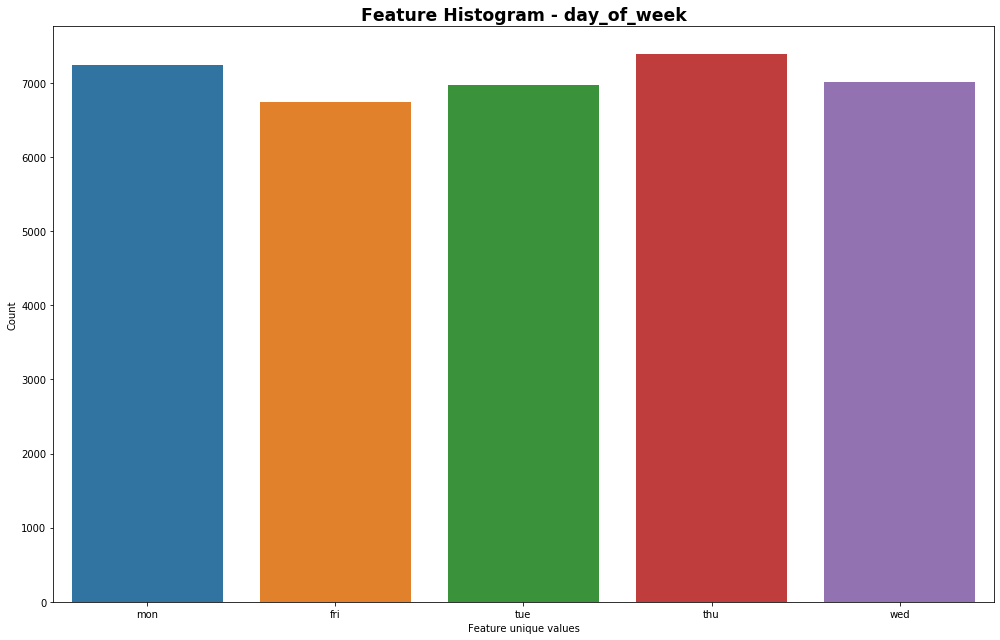

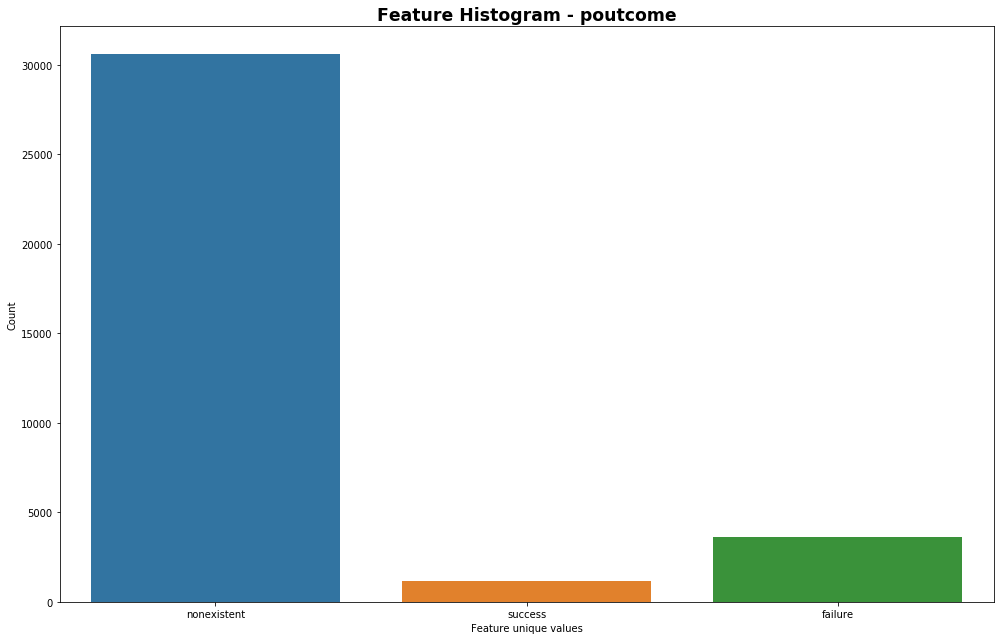

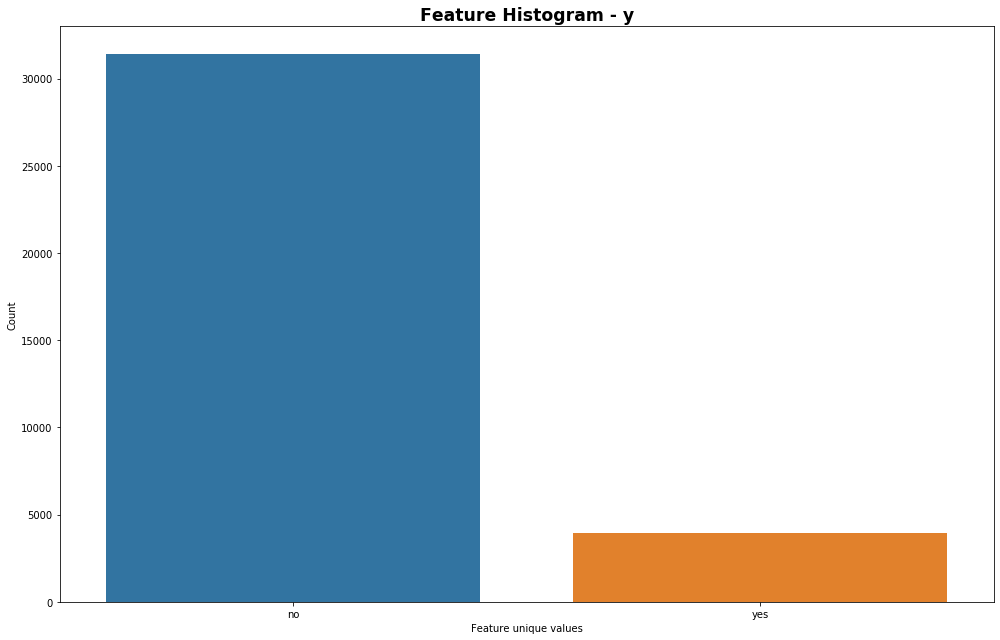

In [6]:
categorcial_variables =list(df.select_dtypes(include="object").columns)
for feature in categorcial_variables:
    plt.figure(figsize=(14, 9))
    sns.countplot(x=feature,data=df)
    plt.title("Feature Histogram - " + feature,fontsize='xx-large', fontweight='bold')
    plt.ylabel("Count")
    plt.xlabel("Feature unique values")
    plt.tight_layout()









Histograms for Numeric features

C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


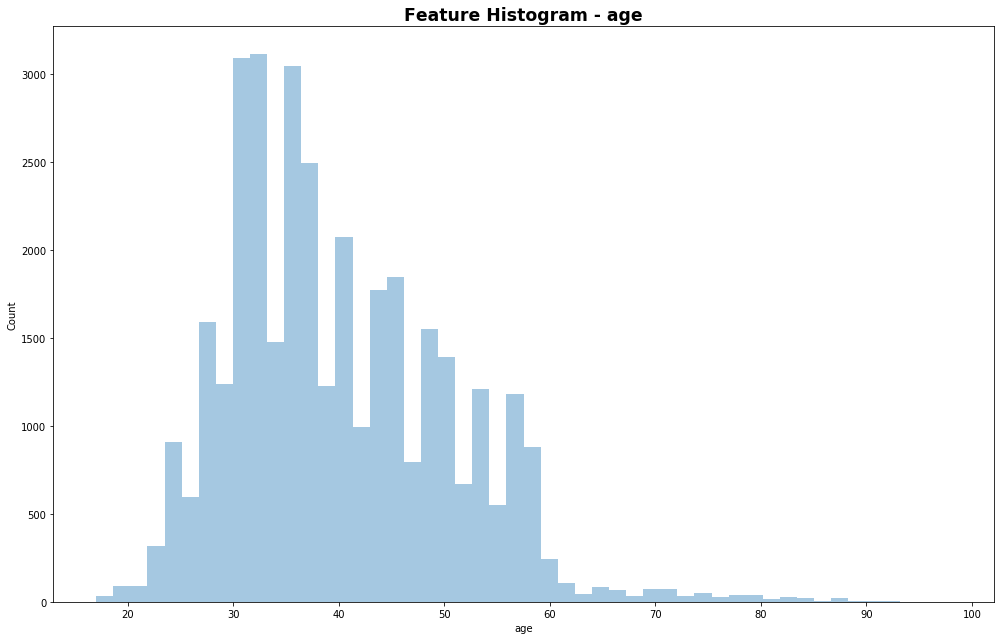

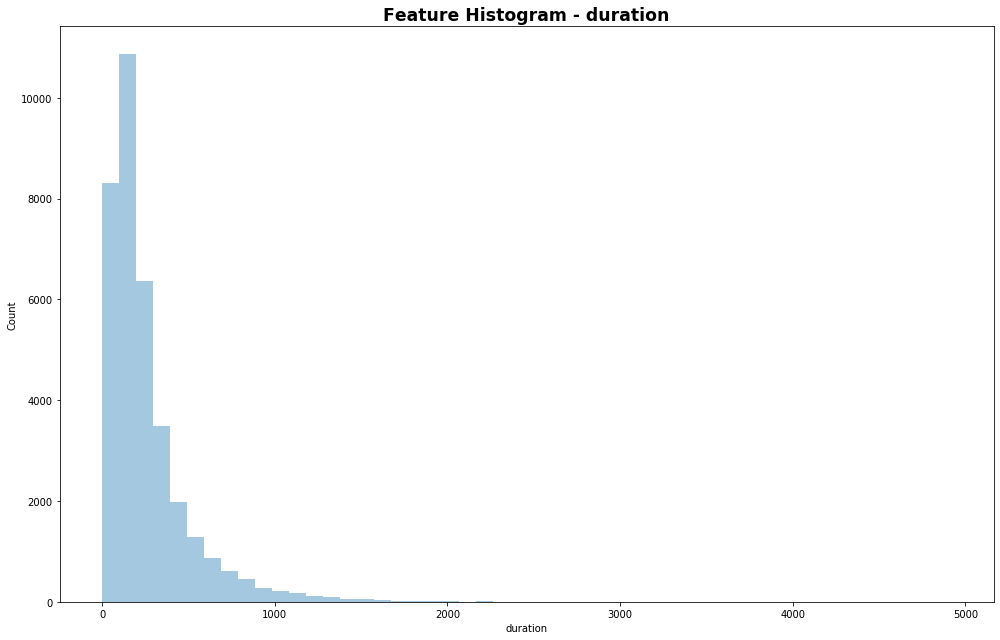

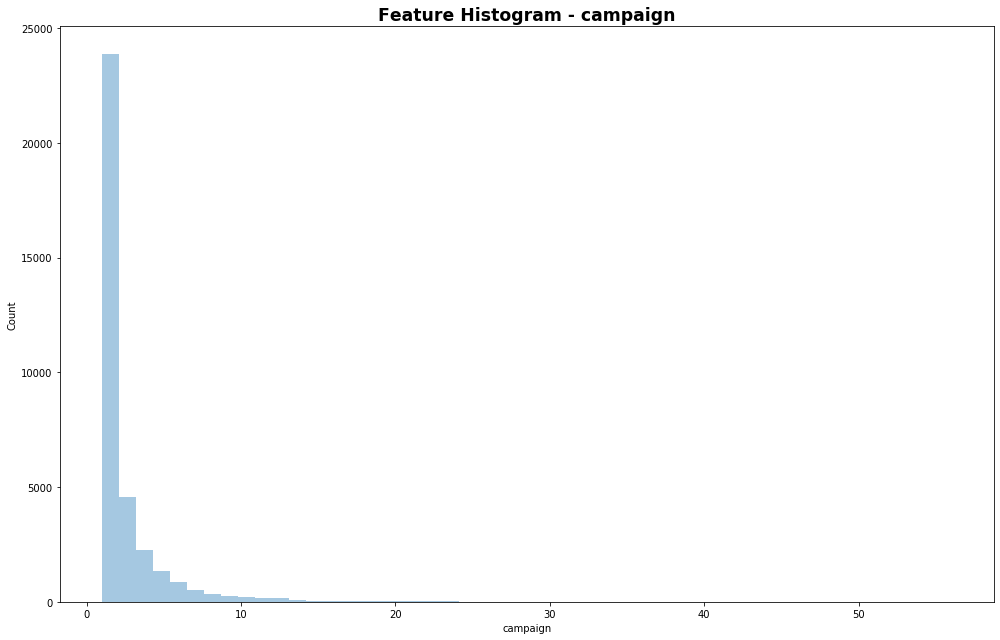

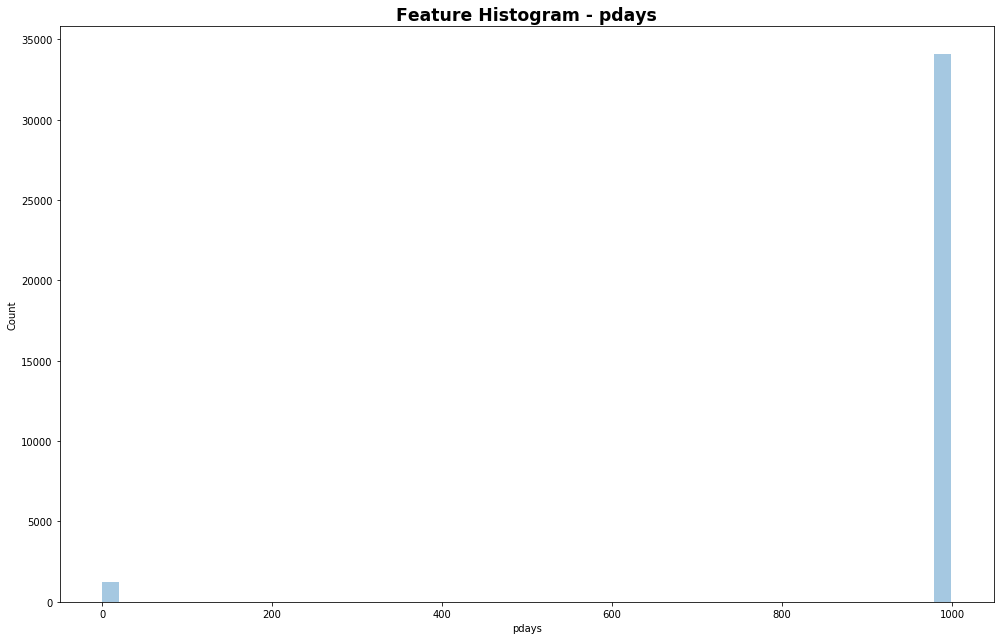

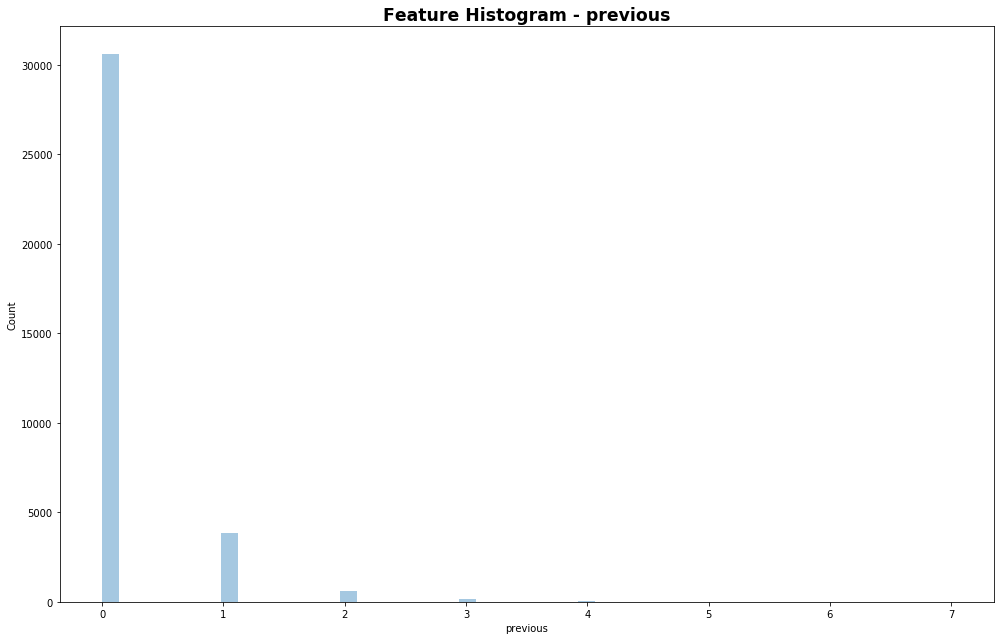

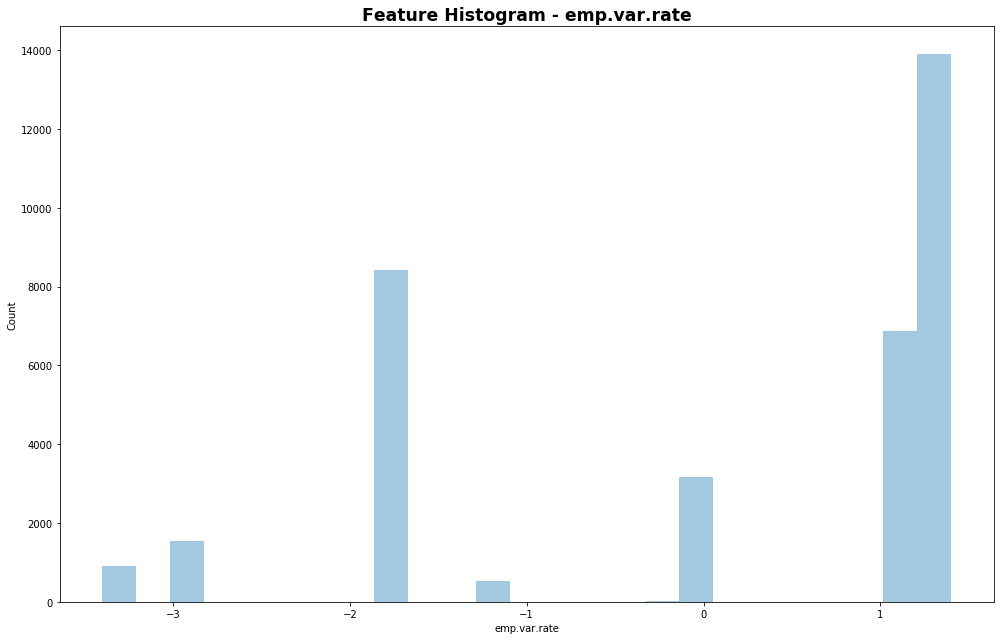

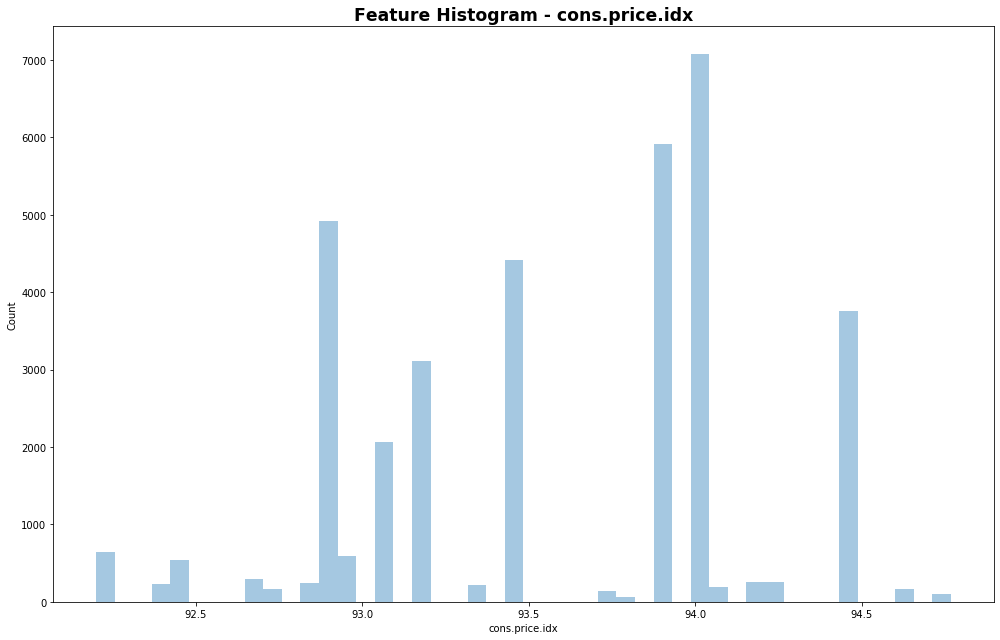

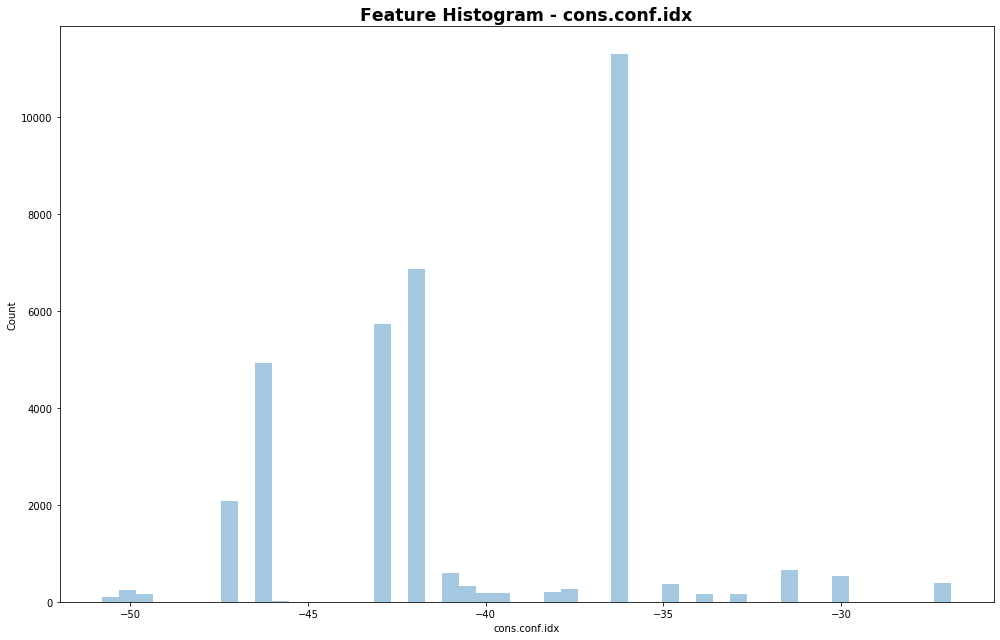

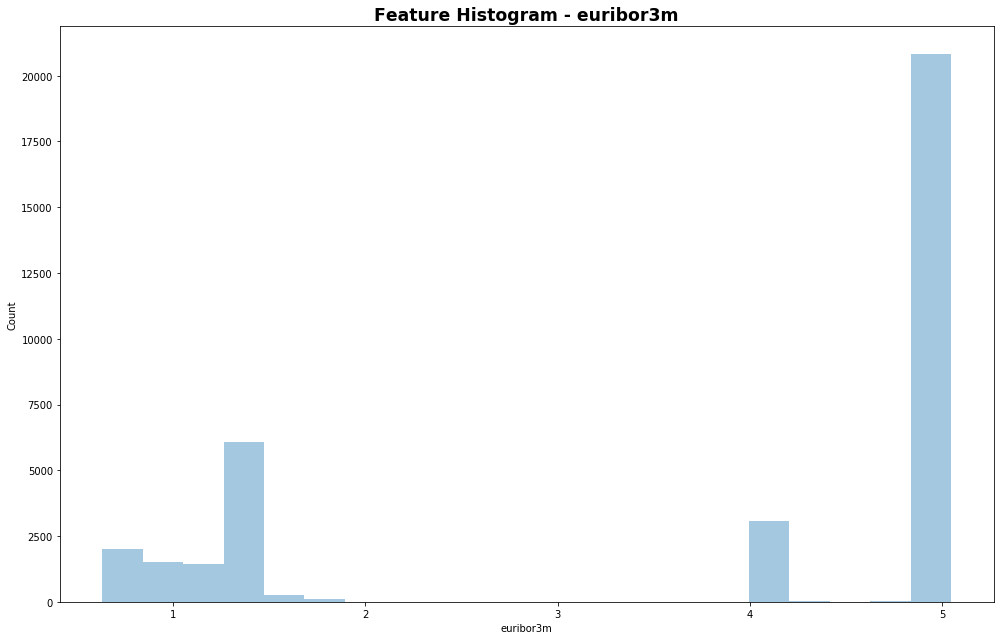

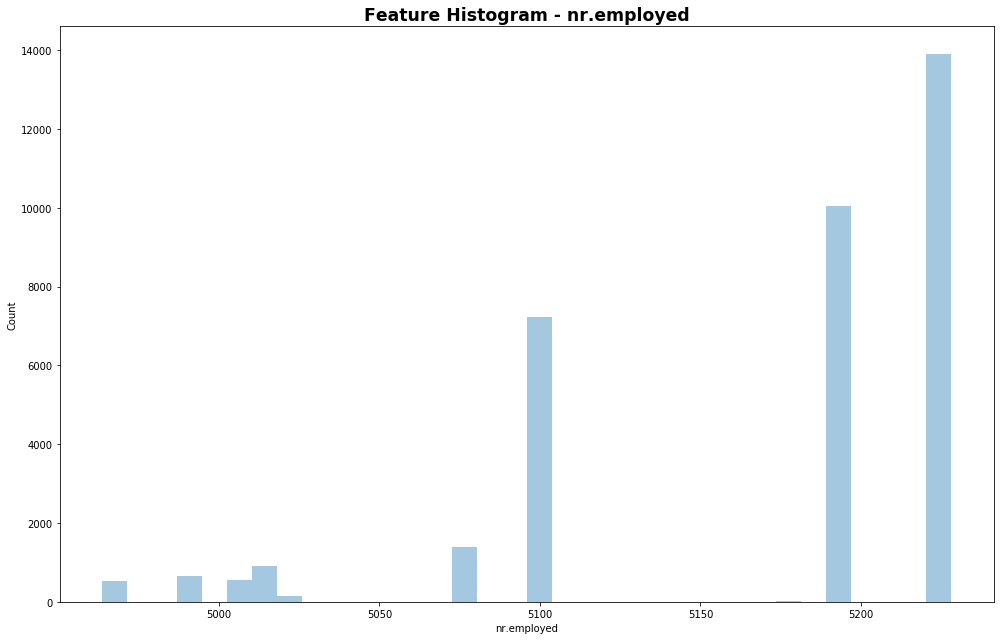

In [7]:
num_features = list(df.select_dtypes(exclude="object").columns)
for feature in num_features:
#devide for economic 
    plt.figure(figsize=(14, 9))
    sns.distplot(df[feature].dropna(),kde=False)
    plt.title("Feature Histogram - " + feature,fontsize='xx-large', fontweight='bold')
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.tight_layout()

<h3>2.4. Categorial manipulations:<h3>

<h4>2.4.1 change "yes" or "no" to 1 or 0<h4>

In [8]:
df['y'] = df.y.map(dict(yes=1, no=0))

<h4>2.4.2 Convert the month list to 4 binary quarters column <h4>

In [9]:
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'];
Q = [1,1,1,1,2,2,2,3,3,3,4,4,4];month_dic=dict(zip(months,Q))
df['month']=df.month.replace(month_dic)
df=pd.get_dummies(df, columns=['month'],prefix='Q')

<h4>2.4.3. convert categorial features to numeric and drop the number of variables<h4>

In [10]:
#education
df['education']=df.education.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic')
#for education it makes sense to use ranking
education_dic={'illiterate': 0,'basic' : 1,'high.school' : 2,'professional.course' : 3,'university.degree' : 4}
df['education']=df.education.replace(education_dic)
#job
df.job.replace(['admin.', 'management'], 'administration_management', inplace=True)
df.loc[(df['age'] > 60 ) & (df['job'] == 'admin.' ) , 'job'] = 'retired'
df.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)
df.job.replace('housemaid', 'services')
df['job']=df.job.replace('entrepreneur', 'self-employed')
# Convert other Series from yes or no to binary
df['housing'] = df.housing.map(dict(yes=1, no=0));
df['loan'] = df.loan.map(dict(yes=1, no=0));
df=df.rename(columns = {'contact':'contact_by_cellular'})
df['contact_by_cellular'] = df.contact_by_cellular.map(dict(cellular = 1, telephone = 0))

<h2>3. Missing Values<h2>

In [11]:
print("Total NaN rows = " + str(sum(df.isna().sum())))
 #Present NAn % in each feature. 
(100*df.isna().sum()/df.shape[0]).round(1)
#we need to see how values are distributed:
#first, we convert unknown values from NaN so they will be countable as unknown:
df['default'] = df.default.replace(np.nan,'unknown',regex=True)
#default
pd.crosstab(df['y'],df['default'],dropna=True).apply(lambda r: r/r.sum(), axis=1).round(4)
#most of No are at default, so we cant really learn from it. then, it will be deleted
df=df.drop("default",axis=1)
#loan
df['loan'] = df.loan.replace(np.nan,'unknown',regex=True)
pd.crosstab(df['y'],df['loan']).apply(lambda r: r/r.sum(), axis=1).round(2)
df['loan'] = df['loan'].replace('unknown',0)
#housing
df['housing'] = df.housing.replace(np.nan,'unknown',regex=True)
pd.crosstab(df['y'],df['housing']).apply(lambda r: r/r.sum(), axis=1).round(2)
#values distribute practicly evenly, therefore we can delete uknowns:
df = df[df.housing != "unknown"]

Total NaN rows = 11190


 Our hypothesn here is that ‘job’ is influenced 
 by the ‘education’ of a person. Hence, 
 we can infer ‘job’ based on the education of the person.
 Moreover, since we are just filling the missing values,
 we are not much concerned about the causal inference.
 We, therefore, can use the job to predict education.

to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'.


In [12]:
a=pd.crosstab(df['job'], df['education'], rownames=['job'], colnames=['education'])

While imputing the values for job and education, we were cognizant of the fact that
the correlations should make real world sense. If it didn't 
make real world sense, we didn't replace the missing values.

Text(0, 0.5, 'Count')

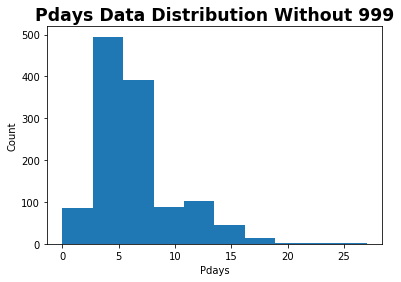

In [13]:
#job
df['job'] = df.job.replace(np.nan,'unknown',regex=True)
df.loc[(df['job']=='unknown') & (df['education']==1), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']==3), 'job'] = 'technician'
#education 
df['education'] = df.education.replace(np.nan,'unknown',regex=True)
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 4
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 2
#Impute by mean value for age & campaign
#df = df.replace('unknown',np.nan)
#age
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df["age"] = imputer.fit_transform(df[['age']])
#campaign
df['campaign'] = imputer.fit_transform(df[['campaign']])
# Examine the missing values in 'pdays'
plt.figure()
plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.title("Pdays Data Distribution Without 999", fontsize='xx-large', fontweight='bold')
plt.xlabel("Pdays")
plt.ylabel("Count")

Filtered out missing values encoded with an out-of-range value when
plotting the histogram of values in order to properly understand
the distribution of the known values. Here, histograms were
created using matplotlib.


In [14]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count')

poutcome,failure,nonexistent,success
pdays,,,
0,NaN,NaN,14.0
1,NaN,NaN,20.0
2,NaN,NaN,51.0
3,3.0,NaN,356.0
4,2.0,NaN,96.0
5,4.0,NaN,34.0
6,22.0,NaN,309.0
7,13.0,NaN,34.0
8,4.0,NaN,10.0


As we can see from the above table, the majority of the values for 'pdays'
are missing. The majority of these missing values occur when the 'poutcome'
is 'non-existent'. This means that the majority of the values in 'pdays'
are missing because the customer was never contacted before. To deal with 
this variable, we removed the numerical variable 'pdays' and replaced it
with categorical variables with following categories: p_days_missing, 
pdays_less_5, pdays_bet_5_15, and pdays_greater_15.

Add new categorical variables to our dataframe.

In [15]:
df['pdays_missing'] = 0;
df['pdays_less_5'] = 0;
df['pdays_greater_15'] = 0;
df['pdays_bet_5_15'] = 0;
df['pdays_missing'][df['pdays']==999] = 1;
df['pdays_less_5'][df['pdays']<5] = 1;
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1;
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1;
df= df.drop(['pdays','pdays_less_5'], axis=1);

C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\sit

Since we have many categorical variables, dummy variables needs to be created for those vaiables.

In [16]:
#convert categorical variables to dummy
df = pd.get_dummies(df , columns = ['job', 'marital' ,'day_of_week', 'poutcome'])
print("Now the total NaN rows = " + str(sum((df == 'unknown').sum())))
df = df[df != "unknown"]
print("we now remove all other NaN")
df = df.dropna()

Now the total NaN rows = 1323
we now remove all other NaN


In [17]:
print("Number of deleted rows = " + str(df_copy_original.shape[0]-df.shape[0]))

Number of deleted rows = 2166


In [18]:
print("only "+ str(round(100*(df_copy_original.shape[0]-df.shape[0])/df.shape[0],1))+" %")

only 6.5 %


In [19]:
print("Finally, the total NaN rows = " + str(sum(df.isna().sum())))

Finally, the total NaN rows = 0


<h3>2.5. correlation heat map<h2>

Text(0.5, 1, 'Correlation Matrix')

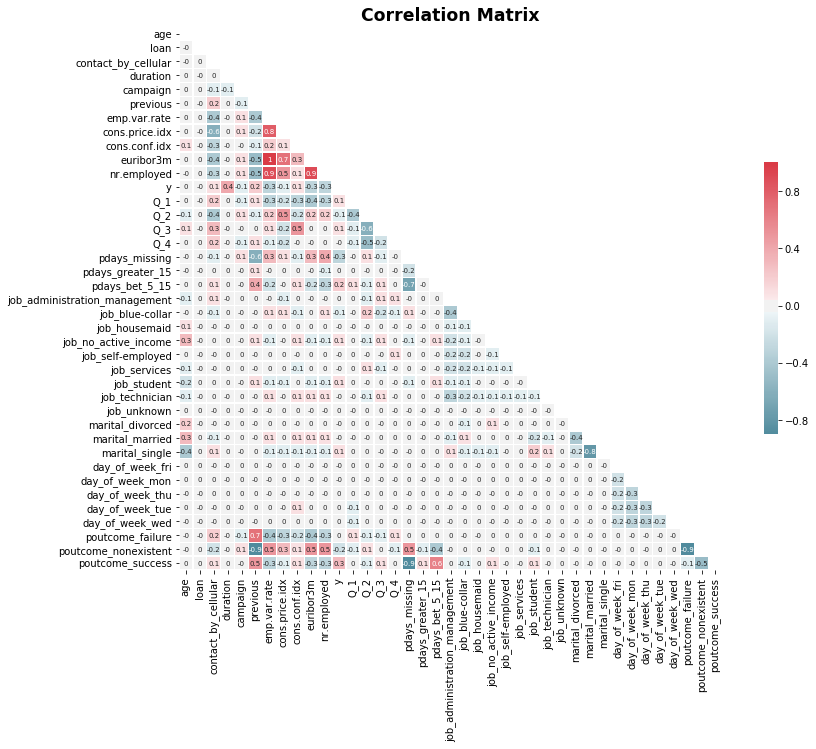

In [20]:
cor = df.corr().round(1)
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20, 15))
heatmap=sns.heatmap(cor,mask=mask,annot=True,annot_kws={"size": 10},
                    center=0,cmap=cmap,square=True, linewidths=.5,
                    cbar_kws={"shrink": .5},yticklabels=1,xticklabels=1)
plt.title("Correlation Matrix", fontsize='xx-large', fontweight='bold')

we can see from heatmap that the highest correlate features (abs(0.8) and above)
the features the economic features: **["nr.employes"-"emp.var.rate"],["cons.price.idx"-"emp.var.rate"]
["euribor3m"-"emp.var.rate"],["nr.employes"-"euribor3m"]**
nr.employed and emp.var.rate are  *highly  corelated* and also nr.employed
and euribor3m are highly  corelated.  
because that we will remove emp.var.rate and euribor3m

#### duration

The variable “duration” will need to be dropped before we start building a predictive model
because it highly affects the output target (e.g., if duration=0 then y=”no”). 

Yet, the duration is not known before a call is performed.

#### Q4

Delete Q4 in order to avoid dummy variable trap.

In [21]:
#Delete the features above at 1 command
df=df.drop(["duration","Q_4","euribor3m","emp.var.rate","poutcome_nonexistent","marital_single"],axis=1)
df_copy_feature_filtered=df_copy_original.drop(["duration","euribor3m","emp.var.rate"],axis=1)

Now we want to see the updated correlation matrix

Text(0.5, 1, 'Updated Correlation Matrix')

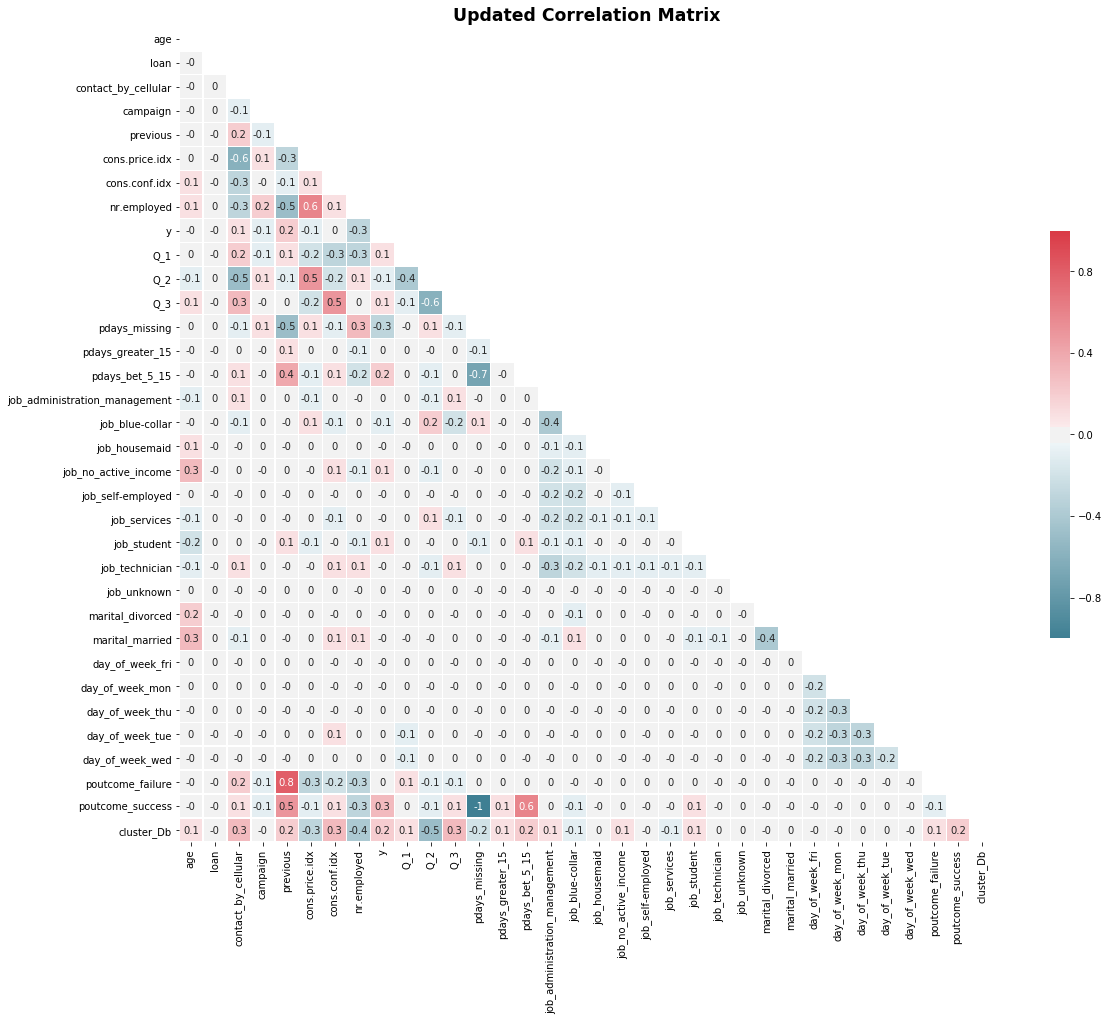

In [37]:
cor = df.corr().round(1)
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20, 15))
heatmap=sns.heatmap(cor,mask=mask,annot=True,annot_kws={"size": 10},
                    center=0,cmap=cmap,square=True, linewidths=.5,
                    cbar_kws={"shrink": .5},yticklabels=1,xticklabels=1)
plt.title("Updated Correlation Matrix", fontsize='xx-large', fontweight='bold')

<h2>4. Data Normalization<h2>

<h3>4.1. Box Plot <h2>

**Outliers: Outliers are defined as 1.5 x Q3 value (75th percentile).**

In [23]:
feature_lst=["cons.price.idx","nr.employed","cons.conf.idx","age","campaign","previous"]
df_with_outliers=df.copy()

**cons.price.idx**

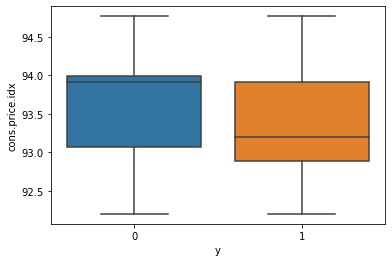

In [24]:
sns.boxplot(x='y', y="cons.price.idx", data=df_with_outliers)

There are no outliers for this feature.

**nr.employed**

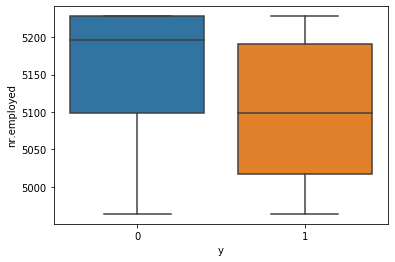

In [25]:
sns.boxplot(x='y', y="nr.employed", data=df_with_outliers)

There are no outliers for this feature.

**cons.conf.idx**

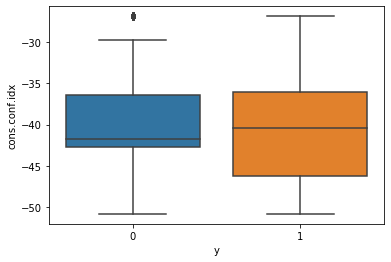

In [26]:
sns.boxplot(x='y', y="cons.conf.idx", data=df_with_outliers)

There are some unusual results in the target variable "no", but these do not significantly exceed the upper limit. 

Then, they fit the upper bound of the target variable "yes". 

Therefore, we chose to leave it.

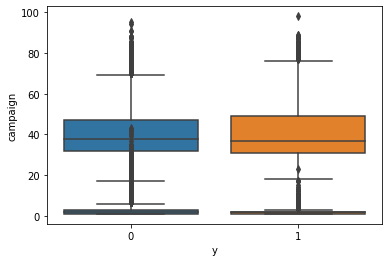

In [27]:
sns.boxplot(x='y', y="age", data=df_with_outliers)
sns.boxplot(x='y', y="campaign", data=df_with_outliers)

We have outliers as max('age') and max('campaign') > 1.5Q3('age') and >1.5Q3('campaign') respectively.

But we also see that the value of these outliers are not so unrealistic (max('age')=98 and max('campaign')=56).

Hence, we need not remove them since the prediction model should represent the real world. 

This improves the generalizability of the model and makes it robust for real world situations. 

The outliers, therefore, are not removed.

**"previous"**

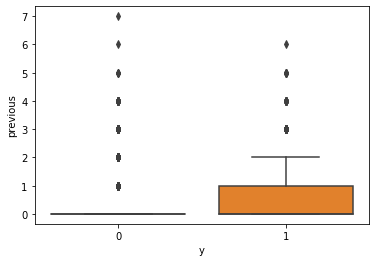

In [29]:
sns.boxplot(x='y', y="previous", data=df_with_outliers)

This variable has many unusual results, from the database, The unusual results belong to many calls made to a customer and therefore the outlierresults are much higher.

We decided to sift the top results that exceed 3 times the upper limit, leaving the other results less than the top limit.

In [31]:
df_outliers=df_with_outliers[["previous"]]

<h3>4.2. Normalize features <h2>

In [32]:
from sklearn.preprocessing import MinMaxScaler   
numeric_df = df.select_dtypes(exclude="object")
scaler = MinMaxScaler((-1,1))
normalized_df_data =scaler.fit_transform(numeric_df.values)
x_scaled=numeric_df

<h2>5. Outlier Detection <h2>

<h3>5.1. Clustrering by DBSCAN <h3>

*The optimal value for epsilon will be found at the point of maximum curvature.*

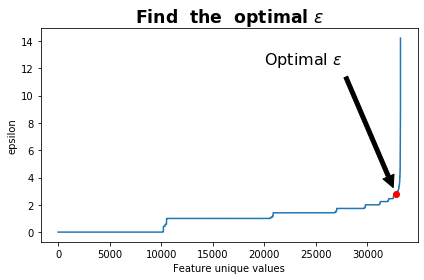

In [33]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_scaled)
distances, indices = nbrs.kneighbors(x_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title("Find  the  optimal "+r'$  \varepsilon$',fontsize='xx-large', fontweight='bold')
plt.ylabel("epsilon")
plt.xlabel("Feature unique values")
plt.plot([32758], [2.8], 'ro')
plt.annotate('Optimal '+r'$\varepsilon$', (32758,2.8),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')
plt.tight_layout()

eps = the best epsilon is at the "elbow" of NearestNeighbors graph

In [34]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.8).fit(x_scaled)
labels=db.labels_
clusterNum=len(set(labels))
df["cluster_Db"]=labels
realClusterNum=len(set(labels))-(1 if -1 in labels else 0)
print("Number of clusters is "+str(realClusterNum))
df = df[df.cluster_Db != -1]
Num_outliers_1st=df_with_outliers.shape[0]-df.shape[0]
noise_percentage=round(100*Num_outliers_1st/df.shape[0],0)
print("Number of outliers is "+str(Num_outliers_1st)+ ", Noise accounts for "+str(noise_percentage)+"%  of the total dataset" )

Number of clusters is 69
Number of outliers is 1025, Noise accounts for 3.0%  of the total dataset


<h3>5.2. Multiple Clustrers by DBSCAN <h3>

**Lots of clusters means low number of noise, therefore low number of outliers.**

<h3>5.3. Another method to remove outliers <h3>

In [35]:
from scipy import stats
z = np.abs(stats.zscore(df_outliers))
#define a threshold to identify an outlier
threshold = 3
df_outliers=df_outliers[(z < threshold).all(axis=1)]
Num_outliers_2nd=df_with_outliers.shape[0]-df_outliers.shape[0]

<h2>6. Predictive Model <h2>

<h3>6.1. 3 predictive models for fitting <h3>

In [ ]:
#pca
X = df.drop("y",axis=1)
y = df.y.values
nonZeroYCount = np.count_nonzero(df[28])
prop_nonzero = nonZeroYCount/len(df[28])
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
LR_y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_cm= confusion_matrix(y_test, LR_y_pred)
col_names = ['a_0','a_1' ]
index_names = ['p_0','p_1' ]
LR_accuracy = (LR_cm[0][0] + LR_cm[1][1]) /np.sum(LR_cm)
print(LR_accuracy )
LR_precision =  (LR_cm[1][1] /np.sum(LR_cm[: , 1])) #TP/(TP+FN) Predicted 1 and actual 1 /(total actual 1)
print (LR_precision) 
LR_recall = LR_cm[1][1] /np.sum((LR_cm[1 , :])) #TP/(TP+FN)  Predicted 1 and actual 1   / total Predicted 1
print (LR_recall) 
#Creating the LR classification report
from sklearn.metrics import classification_report , roc_auc_score , roc_curve
print(classification_report(y_test, LR_y_pred)) 
#Obtaining the ROC score
roc_auc = roc_auc_score(y_test, LR_y_pred)
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, LR_y_pred)
#Plotting the curve
plt.plot(fpr, tpr, label=' Logistic Regression (AUC = %0.03f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
" axis x =TP RATE = FP/ (FP +TN) = by mistake predict as 1/ total 0. low x is good"
" axis y =FP RATE = TP/(TP + FN) = said it 1 and was right /total 1. high y is good."
plt.title('ROC curve for Logistic regression')
plt.legend(loc="upper left")
plt.show()
LR_cm= pd.DataFrame(LR_cm, index=col_names, columns=index_names) 
# checking another therold for the Logistic Regression
THRESHOLD = 0
classifier.fit(X_train, y_train)
# Predicting the Test set results
for THRESHOLD in [x * 0.05 for x in range(2, 20)]:
    LR_y_pred = classifier.predict(X_test)
    LR_y_pred= np.where(classifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
    print("AUC IS :", round(roc_auc_score(y_test, LR_y_pred) , 3) , "for this thersold: " , round(THRESHOLD,2))
LR_y_pred_T_15= np.where(classifier.predict_proba(X_test)[:,1] >0.15, 1, 0)  
LR_cm_T_15= confusion_matrix(y_test, LR_y_pred_T_15)
LR_cm_T_15= pd.DataFrame(LR_cm_T_15, index=col_names, columns=index_names) 
print(classification_report(y_test, LR_y_pred_T_15)) 
LR_y_pred = classifier.predict(X_test)
print(classification_report(y_test, LR_y_pred))     
#Obtaining the ROC score
roc_auc = roc_auc_score(y_test, LR_y_pred_T_15)
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, LR_y_pred_T_15)
#Plotting the curve
plt.plot(fpr, tpr, label=' Logistic Regression (AUC = %0.03f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
" axis x =TP RATE = FP/ (FP +TN) = by mistake predict as 1/ total 0. low x is good"
" axis y =FP RATE = TP/(TP + FN) = said it 1 and was right /total 1. high y is good."
plt.title('ROC curve for Logistic regression')
plt.legend(loc="upper left")
plt.show() 
"""# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show() """